## Data importation

In [1]:
import pandas as pd
import numpy as np

data_raw = pd.read_csv("data.csv", delimiter=";")
data = np.array(data_raw)

weights = [4, 3, 5, 3, 5, 1, 12, 9]

C:\Users\Travail\AppData\Local\Temp\ipykernel_2140\3537920797.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## First application of ELECTRE I

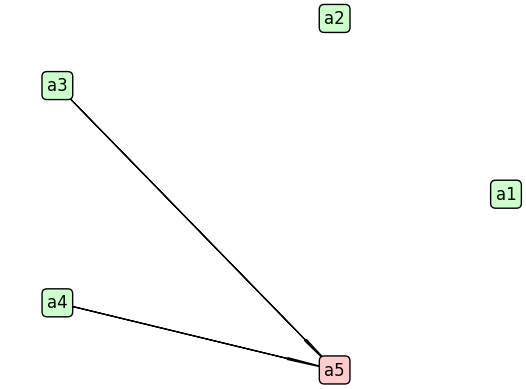

In [2]:
from pyDecision.algorithm import electre_i


c_hat = 0.65
d_hat = 0.25

concordance, discordance, dominance, kernel, dominated = electre_i(data, W = weights, remove_cycles = True, c_hat = c_hat, d_hat = d_hat, graph = True)

## Robustness study

In [12]:

kernels = []

for c_hat in np.arange(0, 1.1, 0.1):

	for d_hat in np.arange(0, 1.1, 0.1):
		try:
			concordance, discordance, dominance, kernel, dominated = electre_i(data, W = weights, remove_cycles = True, c_hat = c_hat, d_hat = d_hat, graph = False)
			kernels.extend(kernel)
		except IndexError:
			pass

In [21]:
ker = np.array(kernels)
actions = ["a1", "a2", "a3", "a4", "a5"]
values = [np.count_nonzero(ker == action) for action in actions]


In [22]:
values

[93, 63, 101, 49, 25]